<center>
NNTI Assignment 3

November 23, 2023

Name: Aleksey Morshnev
Student ID: 7042691
Email: almo00008@stud.uni-saarland.de
</center>

### Exercise 3.3 PCA and Linear Regression (4 points)

Principal Component Regression (PCR) is a method used in statistical analysis, similar to traditional linear regression, model the relationship between a target and the predictor variables.

PCR differs from standard linear regression in that it uses principal components as the predictors rather than the original variables.

PCR's process involves:
<ol>
<li>Implementing Principal Component Analysis (PCA) to transform predictor variables into principal components. Selecting the top k principal components, which account for the majority of the data variance (where k is less than number of original variables). The choice of k is based on cross-validation results. </li>

<li>Constructing a linear regression model using these k principal components.</li>

<li>The reasoning behind PCR is that these fewer principal components capture the majority of the data's variability, and are assumed to be more representative of the connection with the dependent variable. Hence, PCR focuses on a smaller, more significant subset of principal components rather than utilizing all original variables for regression analysis.</li>
</ol>

Write your code in the respective cells. Of course, you can add additional cells or change their order, but please don't significantly change the structure of the notebook. You must use PyTorch tensors to perform all the calculations.  
For each question that requires written answer, please write it in a markdown cell.

#### Getting the data ready

In [1]:
packages_to_install = ["pandas", "scikit-learn", "numpy=1.24.0", "scipy", "matplotlib", "pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia"]

In [2]:
!conda config --add channels conda-forge

In [3]:
%%time
import importlib

for package_name in packages_to_install:
    try:
        importlib.import_module(package_name)
        print(f"{package_name} is already installed.")
    except ImportError:
        print(f"{package_name} is not installed. Installing it now...")
        !conda install -y {package_name}

pandas is already installed.
scikit-learn is not installed. Installing it now...
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.

numpy=1.24.0 is not installed. Installing it now...
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.

scipy is already installed.
CPU times: user 1.23 s, sys: 339 ms, total: 1.57 s
Wall time: 1min 13s


In [79]:
import pandas as pd
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split

Load the data

In [80]:
df = pd.read_csv('./data.csv', sep=',')
df.head()

,Unnamed: 0,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x35,x36,x37,x38,x39,x40,x41,x42,x43,y
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,...,4.15,3.52,3.53,1.36,1.24,1.91,9.81,10.16,19.37,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,...,3.84,3.21,3.22,1.60,1.36,2.15,10.21,10.56,20.17,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,...,3.90,3.27,3.28,1.54,1.33,2.09,10.21,10.56,20.17,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,...,3.80,3.17,3.18,1.40,1.26,1.95,10.21,10.56,20.17,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,...,4.15,3.52,3.53,1.36,1.24,1.91,9.81,10.16,19.37,5


In [81]:
X = df.values[:,:-1]
y = df.values[:,-1]
print(X.shape, y.shape)

(1599, 45) (1599,)


Split into train and test

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(1279, 45)

Standardize Features

In [83]:
X_train_scaled, X_test_scaled = scale(X_train), scale(X_test)

#### 3.3.1 Perform PCA on the input data and visualize the data (2 point)

In [84]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [85]:
X_train_scaled_tensor = torch.tensor(X_train_scaled)

Calculate covariance matrix of the input data. Hint: You can use torch.matmul for matrix multiplication.

In [86]:
covariance_matrix = torch.matmul(X_train_scaled_tensor.t(), X_train_scaled_tensor) / (X_train_scaled_tensor.size(0) - 1)

Perform eigendecomposion of the covariance matrix

In [87]:
eigenvalues, eigenvectors = torch.linalg.eig(covariance_matrix)

Extract the first two principal components of the data, i.e. reduce the dimensionality of the dataset to 2. Plot the result. Different numbers must be represented as different colors on the scatter plot. You can use a randomly sampled portion of the data so that the plot doesn't get cluttered.

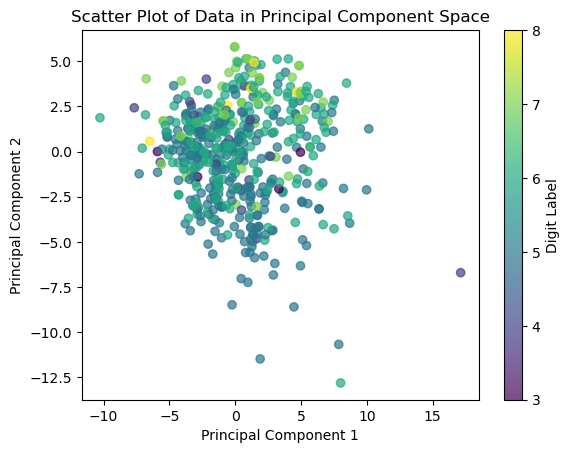

In [88]:
# Get the real parts of the eigenvalues
real_parts = eigenvalues.real

# Sort based on the real parts of the eigenvalues
sorted_indices = torch.argsort(real_parts, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

principal_components = eigenvectors[:, :2]

X_train_scaled_tensor_complex = torch.complex(X_train_scaled_tensor, torch.zeros_like(X_train_scaled_tensor))
X_projected = torch.matmul(X_train_scaled_tensor_complex, principal_components)
X_projected_real = X_projected.real.numpy()

sample_indices = np.random.choice(X_projected_real.shape[0], size=500, replace=False)
X_sampled = X_projected_real[sample_indices]
y_sampled = y_train[sample_indices]

plt.scatter(X_sampled[:, 0], X_sampled[:, 1], c=y_sampled, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of Data in Principal Component Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Digit Label')
plt.show()

Plot the graph of cumulative explained variance vs number of components.

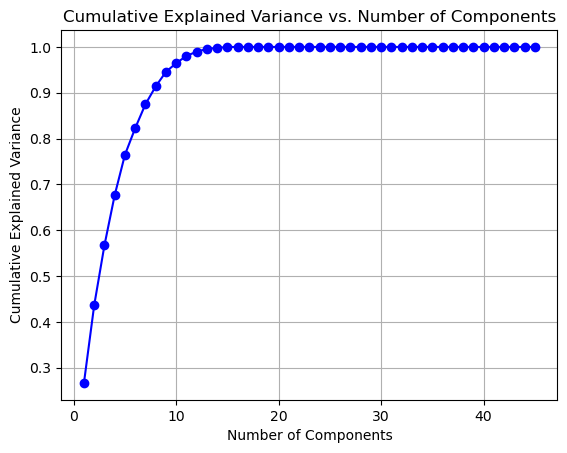

In [89]:
# Compute the explained variance for each principal component
explained_variance = torch.abs(eigenvalues) / torch.sum(torch.abs(eigenvalues))

# Calculate cumulative explained variance
cumulative_variance = torch.cumsum(explained_variance, dim=0)

# Plot cumulative explained variance vs. number of components
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

#### 3.3.2 Train Regression models (2 points)

Given training dataset $D = \{x_i,y_i\}_{i=1}^n$ where $x_i \in \mathbb{R}^d, y_i \in \mathbb{R}$ the ordinary linear least square regression minimizes the cost function 
$f(x,y;w) = \frac{1}{n} \sum_{i=1}^n (y_i - \langle w, x_i \rangle - b )^2$  
But sometimes this leads to overfitting or ill posed problems hence we add a regularizational term to the objective function  
$f(x,y;w) = \frac{1}{n} \sum_{i=1}^n (y_i - \langle w, x_i \rangle - b )^2 + \lambda \sum_{i=1}^d w_i^2$  
In practice we artificially add another dimension of 1's to $X$ to absorb the offset term b such that the objective function in matrix vector form becomes  
$f(x,y;w) = \frac{1}{n} \Vert Y - Xw \Vert^2 + \lambda \Vert w \Vert^2 $ where
    $
        X = \begin{bmatrix}
    X_{1,1} & \cdots & X_{1,d} & 1\\
    X_{2,1}  & \cdots & X_{2,d} & 1 \\
    \vdots & \vdots & \vdots & \vdots \\
    X_{n,1} & \cdots & X_{n,d} & 1
    \end{bmatrix}
    $
 and $w = \begin{bmatrix}w_1 & w_2 & ... & w_d & b \end{bmatrix}^T$. 

The closed form of $w^*$ which minimizes objective function $f(x,y;w) = \frac{1}{n} \Vert Y - Xw \Vert^2 + \lambda \Vert w \Vert^2 $ is $w^* = (X^TX + \lambda \mathbb{I})^{-1}X^TY$ . Your task is to programatically implement this closed form solution for ridge regression.

#### 3.2.2a (1 point)

Implement the fit() function in the ridge_regression class which takes three parameters X, Y and LAMBDA. The fit() function computes the minimizer $w^*$ for the regularized mean squared error objective function. Store the value of $w^*$ in self.w  

Implement the predict() function that takes a matrix X and returns the predictions of the model on X and since the bias term is absorbed in $w$, please do not forget to add another dimension of 1's to X as described earlier in both the fit() and predict functions

Assume that fit() is called before using predict(). 
**Use only basic matrix vector operations from numpy**

In [90]:
class ridge_regression:
    def __init__(self):
        self.w = None # self.w.shape = (d+1,)
    
    def fit(self, X, Y, LAMBDA = 0.3): 
        """
        args: X.shape = (n, d). We account for the bias parameter w_0 in the 
                design matrix X by artificially adding another dimension
                Y.shape = (n, 1)
        returns: None
        Note that you have to artificially add a dimension of 1 as defined earlier to account for the bias term
        """
        # Add a column of ones to X to account for the bias term
        X_extended = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

        # Compute the closed-form solution for ridge regression
        XTX_plus_lambdaI_inv = np.linalg.inv(np.dot(X_extended.T, X_extended) + LAMBDA * np.identity(X_extended.shape[1]))
        self.w = np.dot(np.dot(XTX_plus_lambdaI_inv, X_extended.T), Y)

    def predict(self, X):
        """
        Note that you have to artificially add a dimension of 1 as defined earlier to account for the bias term
        """
        X_extended = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

        # Predictions using the learned weights
        predictions = np.dot(X_extended, self.w)
        return predictions

##### 3.3.2b Run Baseline Regression Model (0.5 points)

To evaluate the performance of the PCR model, we need to have benchmark to compare with. For this train a regression model using the original variables as the Input.

Record the mean squared error for the evaluation

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [92]:
# Train a linear regression model using the original variables
original_model = LinearRegression()
original_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_original = original_model.predict(X_test)

# Calculate the mean squared error
mse_original = mean_squared_error(y_test, y_pred_original)

print("Mean Squared Error (Original Model):", mse_original)

Mean Squared Error (Original Model): 0.3895583799788566


##### 3.3.2c Classification using principal components (0.5 points)

For $K = 1...11$ select top K principal components. Project the X_train_scaled data into a subspace using these $K$ princiapl components. Train a Regression model using this projected dataset. Repeat the projection operation on the X_test_scaled data and predict the output. Evaluate the model's performance using mean squared error.

Plot a graph of model's performance against its $K$ value. Also Plot the baseline MSE from the previous question in the same graph for comparison.

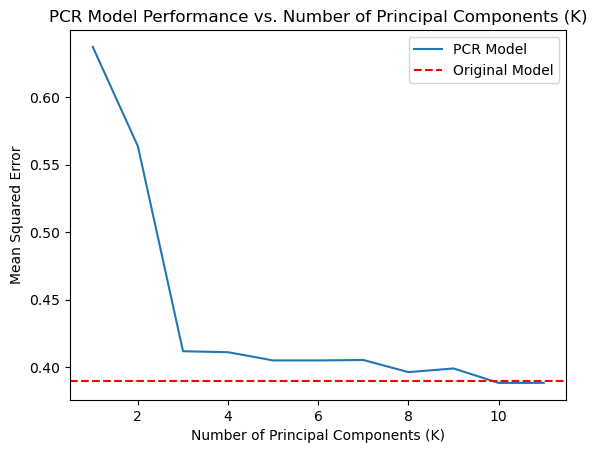

In [93]:
def pcr_evaluation(k_values):
    """
    args: k_values = ndarray. Number of principal components to consider. Example: np.arange(1, 12)
    returns: None
    """
    # Initialize arrays to store MSE values for each K
    mse_pcr_values = []
    
    # Perform PCR for each K
    for K in k_values:
        # Extract the top K principal components using provided code
        principal_components = eigenvectors[:, :K].real
    
        # Project the training and test data into the subspace defined by the top K principal components
        X_train_pca = np.dot(X_train_scaled, principal_components)
        X_test_pca = np.dot(X_test_scaled, principal_components)
    
        # Fit Ridge Regression on the projected training data
        ridge_model = ridge_regression()
        ridge_model.fit(X_train_pca, y_train)
    
        # Predict the output on the projected test data
        y_pred_pcr = ridge_model.predict(X_test_pca)
    
        # Calculate the mean squared error for the current K
        mse_pcr = mean_squared_error(y_test, y_pred_pcr)
        mse_pcr_values.append(mse_pcr)
    
    # Plot the results
    plt.plot(k_values, mse_pcr_values, label='PCR Model')
    plt.axhline(y=mse_original, color='r', linestyle='--', label='Original Model')
    plt.title('PCR Model Performance vs. Number of Principal Components (K)')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()
    
K_values = np.arange(1, 12)
pcr_evaluation(K_values)

How does the performance change with the different $K$ values 

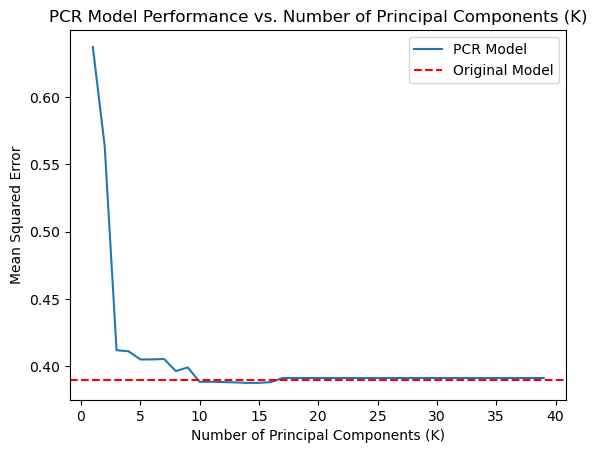

In [94]:
K_values = np.arange(1, 40)
pcr_evaluation(K_values)

Mean Squared Error decreases drastically (with rare elevations) when K decreases from K=1 till K=10. Then it hits plateau till it is K=16. On that plateau MSE is less than of a baseline original model. Then it suddenly increases above baseline original model and stays there forever. 